In [1]:


import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [3]:
# import the data

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
df.shape

(1460, 81)

In [4]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [7]:
#summary statistics for numerical features

numerical_features = df.select_dtypes(include=[np.number])
summary_stat = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stat, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
#summary statistics for categorical features

categorical_features = df.select_dtypes(include=[object])
cat_summary_stat = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stat, 'categorical_features', 'Summary statistics for categorical_features')

display(HTML(html_categorical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [10]:
#Find the null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null Values in the dataset')

#Find the percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of dataset')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [35]:
# Replace infinite values with NaN in the 'SalePrice' column
df['SalePrice'] = df['SalePrice'].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN in 'SalePrice' to avoid issues during fitting
df = df.dropna(subset=['SalePrice'])



In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


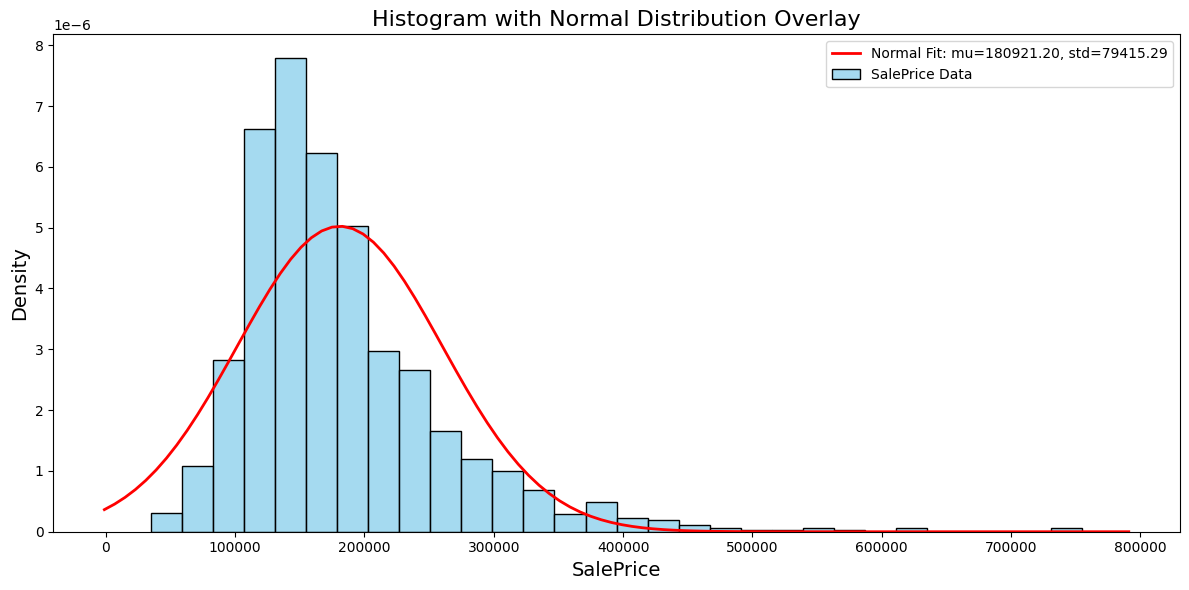

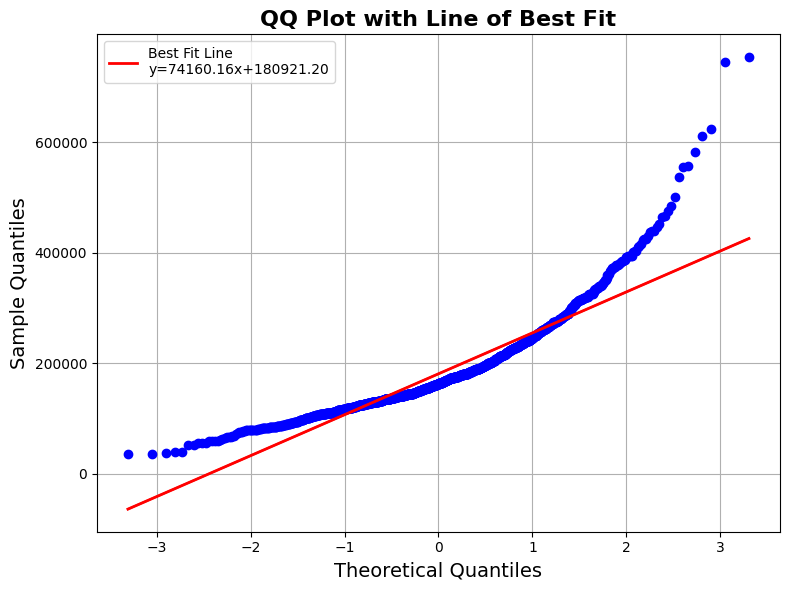

In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a normal distribution to the data
mu, std = stats.norm.fit(df['SalePrice'])

# Create a histogram of 'SalePrice'
plt.figure(figsize=(12, 6))  # Set figure size
sns.histplot(df['SalePrice'], bins=30, kde=False, color='skyblue', stat="density", label="SalePrice Data")

# Create a normal distribution overlay
xmin, xmax = plt.xlim()  # Get x-axis limits from the histogram
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', lw=2, label=f'Normal Fit: mu={mu:.2f}, std={std:.2f}')

# Customize the plot
plt.title('Histogram with Normal Distribution Overlay', fontsize=16)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

#Show the histogram plot
plt.tight_layout()
plt.show()

#Create the QQ plot for 'SalePrice'
fig, ax = plt.subplots(figsize=(8, 6))  # Set figure size

# QQ plot against a normal distribution
stats.probplot(df['SalePrice'], dist="norm", plot=ax)

# Calculate the line of best fit for the QQ plot
osm, osr = stats.probplot(df['SalePrice'], dist="norm")[0]  # Ordered Sample (x, y) values
slope, intercept = np.polyfit(osm, osr, 1)  # Fit a line to the QQ plot

# Add the line of best fit to the QQ plot
ax.plot(osm, slope * osm + intercept, color='red', lw=2, label=f'Best Fit Line\ny={slope:.2f}x+{intercept:.2f}')

#Customize the QQ plot
ax.set_title('QQ Plot with Line of Best Fit', fontsize=16, fontweight='bold')
ax.set_xlabel('Theoretical Quantiles', fontsize=14)
ax.set_ylabel('Sample Quantiles', fontsize=14)
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

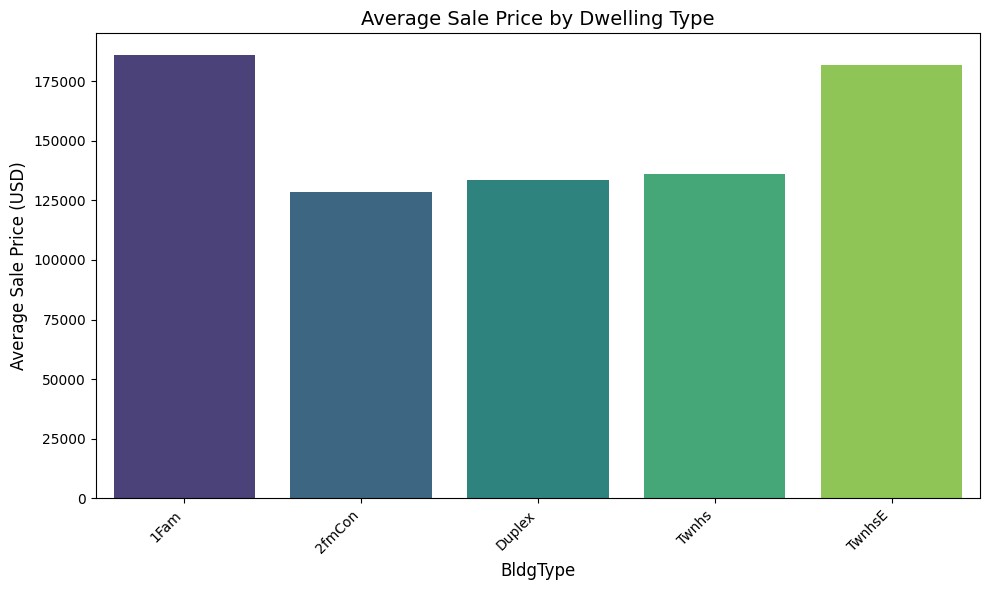

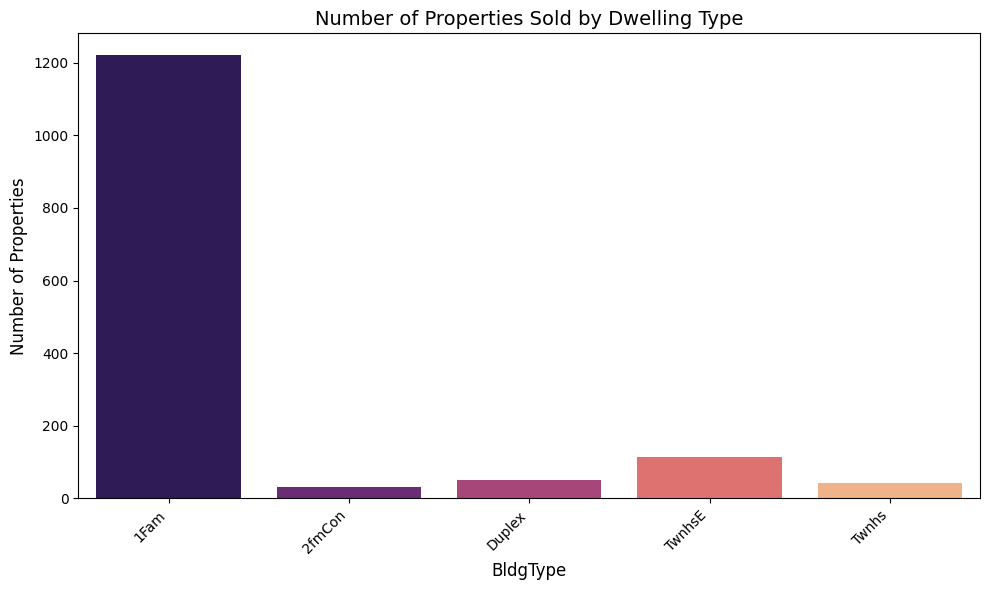

In [38]:
#Group data by DwellingType 
dwelling_price_distribution = df.groupby('BldgType')['SalePrice'].mean().reset_index()

#Create the first bar chart for DwellingType vs SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x='BldgType', y='SalePrice', data=dwelling_price_distribution, palette='viridis')

#Update the layout and format labels for the first bar chart
plt.title('Average Sale Price by Dwelling Type', fontsize=14)
plt.xlabel('BldgType', fontsize=12)
plt.ylabel('Average Sale Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 

#Create a second bar chart showing the distribution of SalePrices by DwellingType
plt.figure(figsize=(10, 6))
sns.barplot(x='BldgType', y='SalePrice', data=df, estimator=len, palette='magma')

#Update layout and format labels for the second graph
plt.title('Number of Properties Sold by Dwelling Type', fontsize=14)
plt.xlabel('BldgType', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


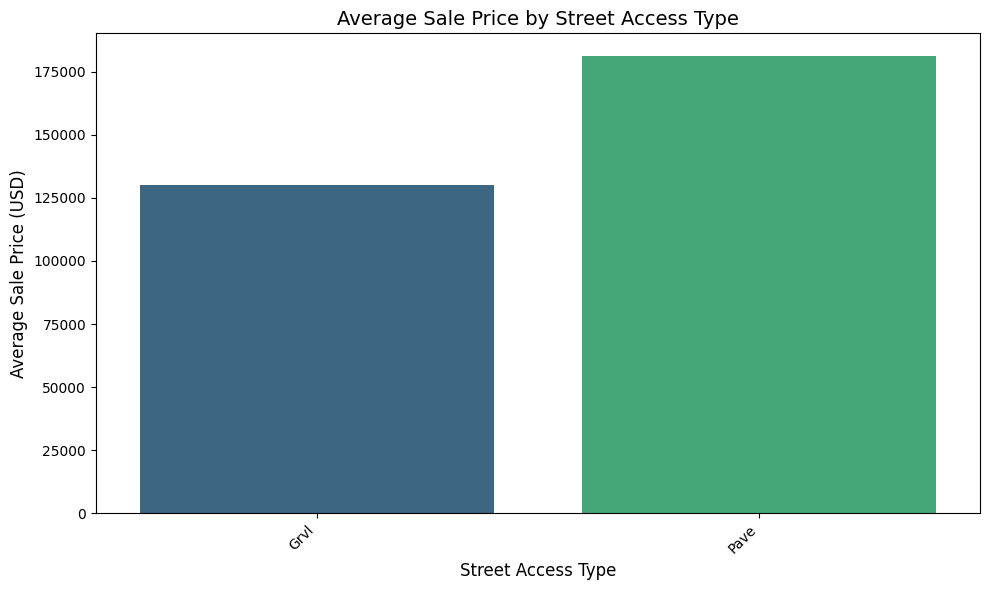

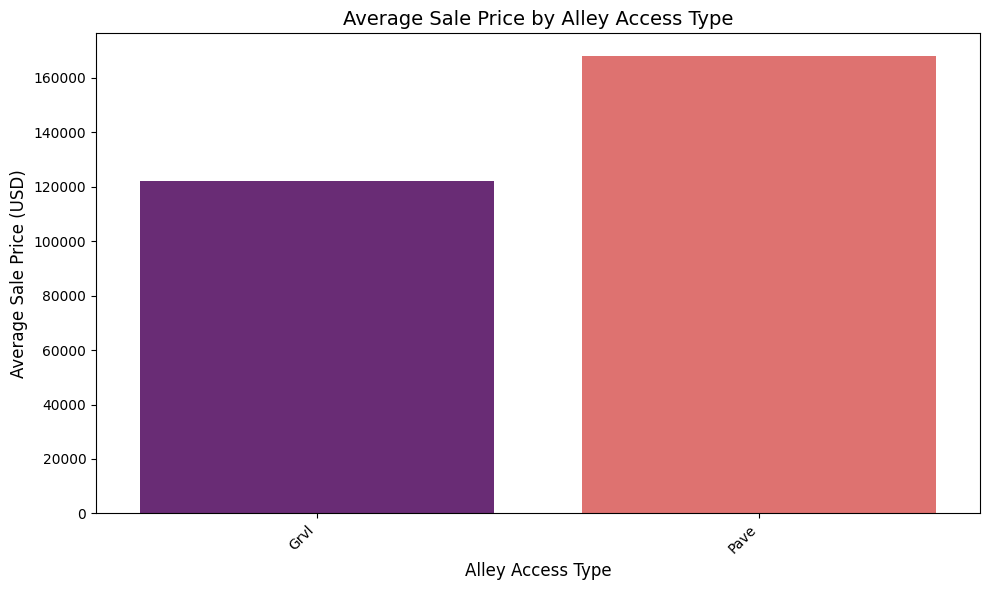

In [41]:
#Group data by Street Access Type and calculate the average SalePrice for each type
street_price_distribution = df.groupby('Street')['SalePrice'].mean().reset_index()

#Create the first bar chart for Street vs SalePrice
plt.figure(figsize=(10, 6))
barplot_street = sns.barplot(x='Street', y='SalePrice', data=street_price_distribution, palette='viridis')

# Update layout and format labels for the street access type bar chart
plt.title('Average Sale Price by Street Access Type', fontsize=14)
plt.xlabel('Street Access Type', fontsize=12)
plt.ylabel('Average Sale Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make space for rotated labels

# Group data by Alley Access Type and calculate the average SalePrice for each type
alley_price_distribution = df.groupby('Alley')['SalePrice'].mean().reset_index()

#Create the second bar chart for Alley vs SalePrice
plt.figure(figsize=(10, 6))
barplot_alley = sns.barplot(x='Alley', y='SalePrice', data=alley_price_distribution, palette='magma')

# Update layout and format labels for the alley access type bar chart
plt.title('Average Sale Price by Alley Access Type', fontsize=14)
plt.xlabel('Alley Access Type', fontsize=12)
plt.ylabel('Average Sale Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

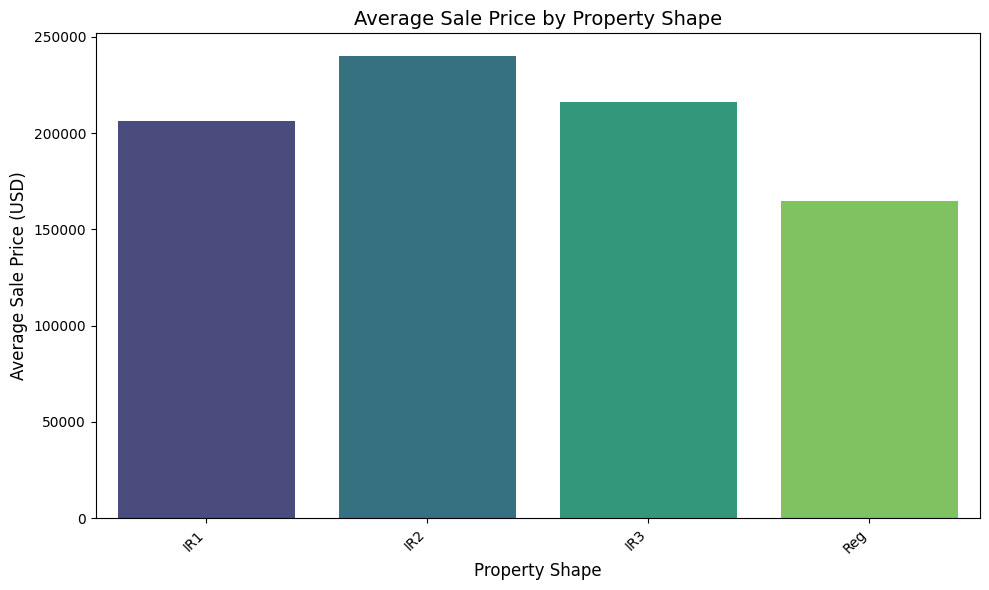

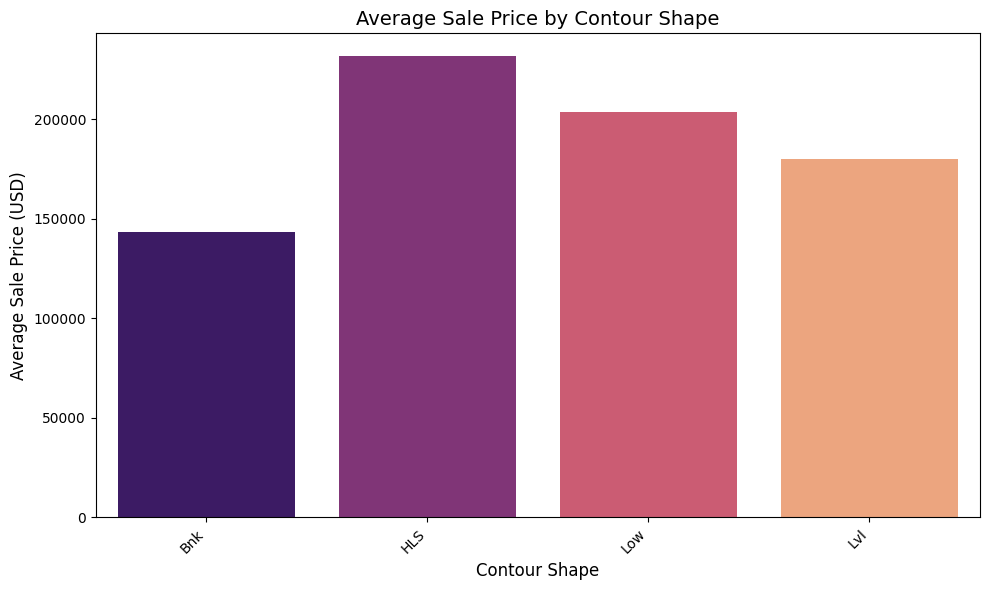

In [44]:
#Create the first bar chart for Shape vs SalePrice
shape_price_distribution = df.groupby('LotShape')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot_shape = sns.barplot(x='LotShape', y='SalePrice', data=shape_price_distribution, palette='viridis')

#Update layout and format labels for the shape price bar chart
plt.title('Average Sale Price by Property Shape', fontsize=14)
plt.xlabel('Property Shape', fontsize=12)
plt.ylabel('Average Sale Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make space for rotated labels

# Create the second bar chart for Contour vs SalePrice
contour_price_distribution = df.groupby('LandContour')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot_contour = sns.barplot(x='LandContour', y='SalePrice', data=contour_price_distribution, palette='magma')

# Update layout and format labels for the contour price bar chart
plt.title('Average Sale Price by Contour Shape', fontsize=14)
plt.xlabel('Contour Shape', fontsize=12)
plt.ylabel('Average Sale Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

Correlation between Property Age and Sale Price: -0.52


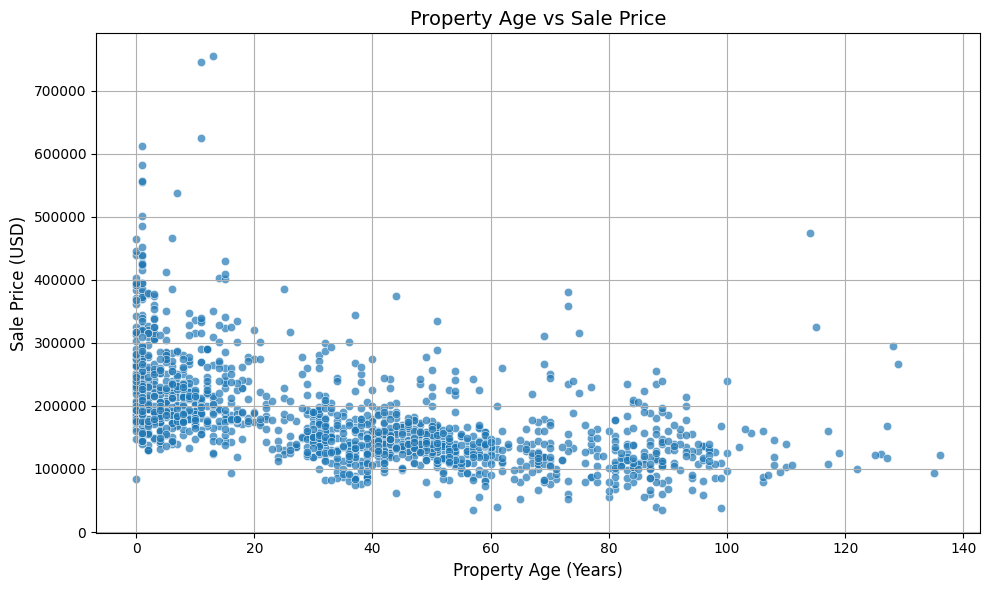

In [45]:
#Property age to saleprice
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

# Calculate the correlation between Property Age and Sale Price
correlation = df[['PropertyAge', 'SalePrice']].corr().iloc[0, 1]
print(f'Correlation between Property Age and Sale Price: {correlation:.2f}')

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PropertyAge', y='SalePrice', data=df, alpha=0.7)

# Update the layout
plt.title('Property Age vs Sale Price', fontsize=14)
plt.xlabel('Property Age (Years)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between Living Area and Sale Price: 0.71


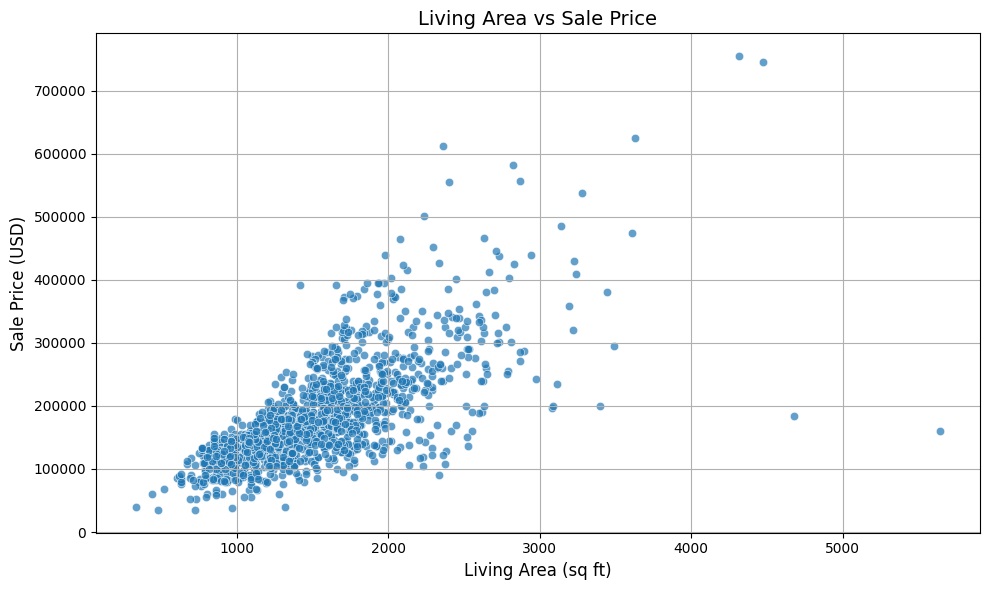

In [47]:
#Correlation between Living Area and Sale Price
correlation = df[['GrLivArea', 'SalePrice']].corr().iloc[0, 1]
print(f'Correlation between Living Area and Sale Price: {correlation:.2f}')

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.7)

# Update the layout
plt.title('Living Area vs Sale Price', fontsize=14)
plt.xlabel('Living Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()

In [7]:
#Create a Data Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Numerical columns transformation: imputer and scaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize the values (z-score)
])

# Categorical columns transformation: imputer and one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical variables
])


In [61]:
#..data pipeline
from sklearn.model_selection import train_test_split


# Define the SalePrice and log transform it
df['LogSalePrice'] = np.log(df['SalePrice'])

# Drop the SalePrice column from the features 
features = df.drop(columns=['SalePrice'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features.drop(columns=['LogSalePrice']), df['LogSalePrice'], test_size=0.2, random_state=42)

# Select numerical columns using select_dtypes
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Select categorical columns using select_dtypes
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale the numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine numerical and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  
        ('cat', categorical_transformer, categorical_cols)  
    ])

# Create a pipeline that applies the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the pipeline to the training and test datasets
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Output transformed data
print("Transformed Training Data:")
print(X_train_transformed)

print("\nTransformed Test Data:")
print(X_test_transformed)

Transformed Training Data:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 94385 stored elements and shape (1168, 287)>
  Coords	Values
  (0, 0)	-1.1192840216867437
  (0, 1)	-0.8667643047469886
  (0, 2)	-0.015313676650351311
  (0, 3)	-0.21289571021689285
  (0, 4)	-0.8204445578548297
  (0, 5)	0.37221730085603477
  (0, 6)	-0.4554689634533773
  (0, 7)	-1.3460630279925625
  (0, 8)	-0.6015313162356289
  (0, 9)	1.0372686113776926
  (0, 10)	-0.28550406121847727
  (0, 11)	-0.40028164505613256
  (0, 12)	0.5726121928947197
  (0, 13)	0.3742352301895073
  (0, 14)	-0.8019229244046748
  (0, 15)	-0.11899866377895676
  (0, 16)	-0.40709314807972335
  (0, 17)	1.1053195824048596
  (0, 18)	-0.24287002311294137
  (0, 19)	-1.0555657250367967
  (0, 20)	-0.7640975231923183
  (0, 21)	0.13621832007914325
  (0, 22)	-0.2127571124887476
  (0, 23)	-0.9645659090752412
  (0, 24)	-0.9585921495629545
  :	:
  (1167, 169)	1.0
  (1167, 175)	1.0
  (1167, 178)	1.0
  (1167, 184)	1.0
  (1167, 189)	1.0
  (1167, 1

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Simulating a dataset with missing values for this example
np.random.seed(0)
X = np.random.rand(100, 5)
y = X @ [1.5, -2, 0.5, 0.2, -1] + np.random.randn(100)  # Some target variable
X[np.random.choice(100, 10), np.random.choice(5, 10)] = np.nan  # Introduce missing values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer (strategy = 'mean')
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define models and hyperparameter grids for tuning
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
    'MLPRegressor': MLPRegressor(max_iter=4000)  # MLPRegressor with maximum iterations set to 1000
}

param_grids = {
    'LinearRegression': {},
    'RandomForestRegressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    },
    'HistGradientBoostingRegressor': {
        'max_iter': [100, 200],
        'max_depth': [3, 5, 7],
    },
    'MLPRegressor': {
        'hidden_layer_sizes': [(100,), (100, 50), (100, 100, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive'],
    }
}

best_models = {}

# Loop over each model and perform grid search for hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grids.get(model_name, {}),  # Get params for the model
                               cv=3,  # 3-fold cross-validation
                               scoring='neg_mean_squared_error',  # Scoring based on MSE
                               n_jobs=-1,  # Use all cores for parallel processing
                               verbose=1)
    
    # Fit the model using GridSearchCV
    grid_search.fit(X_train_imputed, y_train)
    
    # Store the best model found
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

# Evaluate models on test data
for model_name, best_model in best_models.items():
    print(f"\nEvaluating {model_name}...")

    # Predict using the best model found in grid search
    y_pred = best_model.predict(X_test_imputed)
    
    # Calculate and print Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Test MSE for {model_name}: {mse:.4f}")


Tuning LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best score for LinearRegression: -1.3213719143759157
Tuning RandomForestRegressor...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for RandomForestRegressor: {'max_depth': 20, 'n_estimators': 200}
Best score for RandomForestRegressor: -1.3336060527607874
Tuning HistGradientBoostingRegressor...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for HistGradientBoostingRegressor: {'max_depth': 3, 'max_iter': 100}
Best score for HistGradientBoostingRegressor: -1.4212980733566603
Tuning MLPRegressor...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for MLPRegressor: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best score for MLPRegressor: -1.3118103406316457

Evaluating LinearRegression...
Test MSE for LinearRegression: 0.824

In [28]:
#PCA

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Standardize the data before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Apply PCA
pca = PCA()  # No n_components initially to calculate all components
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


# Threshold for explained variance
variance_threshold = 0.95

# Choose the number of components that explain the desired variance
n_components = np.argmax(explained_variance_ratio >= variance_threshold) + 1
print(f"Number of components explaining {variance_threshold * 100}% variance: {n_components}")

# Create a pipeline that includes both scaling and PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components))
])

# Fit and transform the training data using the pipeline
X_train_pca = pca_pipeline.fit_transform(X_train_imputed)




Number of components explaining 95.0% variance: 5


In [29]:
#Feature Engineering

import pandas as pd
import numpy as np

def feature_engineering(df):
    # Copy the original DataFrame to avoid modifying it directly
    df_copy = df.copy()

    # Convert categorical features to numerical (one-hot encoding)
    categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
    df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

    # Fill missing values
    # For numeric columns, fill with median
    for col in df_copy.select_dtypes(include=[np.number]).columns:
        df_copy[col].fillna(df_copy[col].median(), inplace=True)

    # For categorical columns, fill with 'None'
    for col in df_copy.select_dtypes(include=['object']):
        df_copy[col].fillna('None', inplace=True)

    # Create new features
    # Age of the house
    df_copy['HouseAge'] = df_copy['YrSold'] - df_copy['YearBuilt']

    # Total number of bathrooms (including half baths as 0.5)
    df_copy['TotalBath'] = (df_copy['FullBath'] + 
                            0.5 * df_copy['HalfBath'] + 
                            df_copy['BsmtFullBath'] + 
                            0.5 * df_copy['BsmtHalfBath'])

    # Total living area
    df_copy['TotalLivingArea'] = (df_copy['1stFlrSF'] + 
                                   df_copy['2ndFlrSF'] + 
                                   df_copy['TotalBsmtSF'])

    # Combine outdoor space
    df_copy['TotalOutdoorSF'] = (df_copy['WoodDeckSF'] + 
                                  df_copy['OpenPorchSF'] + 
                                  df_copy['EnclosedPorch'] + 
                                  df_copy['3SsnPorch'] + 
                                  df_copy['ScreenPorch'])

    # Feature for total number of rooms
    df_copy['TotalRooms'] = df_copy['TotRmsAbvGrd'] + df_copy['BedroomAbvGr']

    # Handling lot area features
    df_copy['LotFrontage_per_Area'] = df_copy['LotFrontage'] / df_copy['LotArea']
    df_copy['LotArea_sqft'] = df_copy['LotArea'] ** 2

    # Feature for garage area per car
    df_copy['GarageArea_per_Car'] = df_copy['GarageArea'] / (df_copy['GarageCars'] + 1)  # Add 1 to avoid division by zero


    return df_copy


In [31]:
# Identify numeric and categorical features
target_column = 'SalePrice'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Exclude the target column from numeric features
if target_column in numeric_features:
    numeric_features.remove(target_column)

# Create a ColumnTransformer for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a full pipeline with a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Prepare the data for training
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Test Mean Squared Error: {mse}')

Test Mean Squared Error: 884815741.7016436
